In [25]:
import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.traveltime as tt

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x23961bab8e0>)

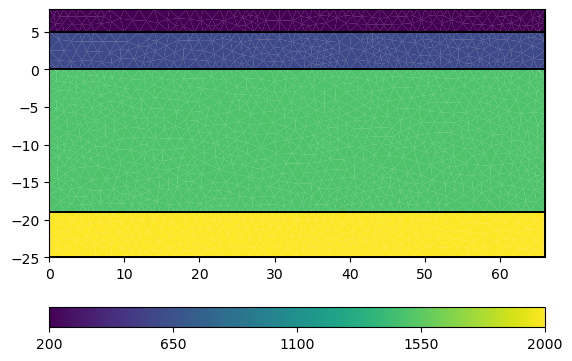

In [26]:
left = 0; right = 66; depth = 25;
geometry= mt.createWorld(start = [left, 8], end = [right, -depth], layers=[5, 0, -19]);
meshVel = mt.createMesh(geometry, quality=34.3, area=1.5, smooth=True);
# pg.show(meshVel, markers=True)
velMap = [[1, 200], [2, 600], [3, 1500], [4, 2000]];
# vel = pg.solver.parseMapToCellArray(velMap, meshVel)
vel = meshVel.populate("vel", velMap)
meshVel.setCellMarkers(pg.Vector(meshVel.cellCount()))
pg.show(meshVel, vel)

In [28]:
# meshVel["marker"] = 0

Data: Sensors: 28 data: 211, nonzero entries: ['g', 's', 't', 'valid']


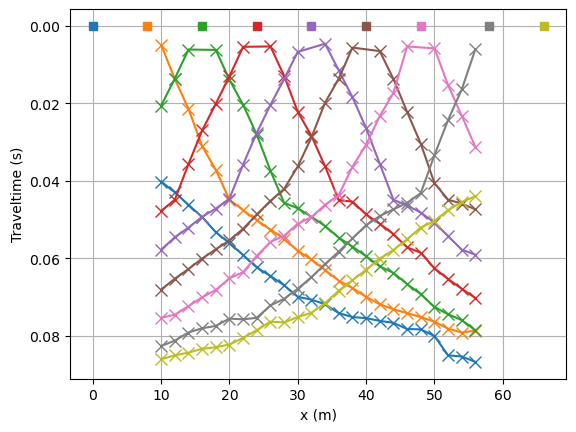

In [29]:
data = tt.load("picking_NS_20240607.sgt")
print(data)
tt.show(data)

23/02/24 - 09:36:38 - pyGIMLi - INFO - 10 data of 211 not shown
23/02/24 - 09:36:38 - pyGIMLi - INFO - [89, 108, 112, 127, 131, 135, 146, 150, 154, 158]


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x23961e0f1f0>)

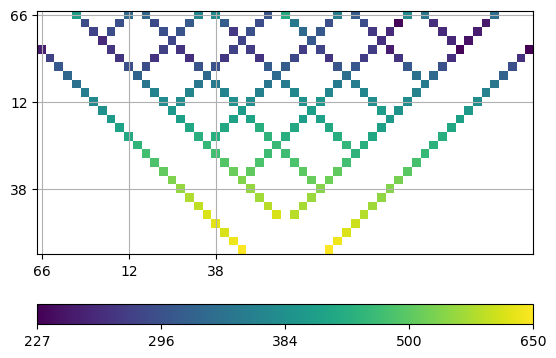

In [35]:
tt.showVA(data, pseudosection=True)

23/02/24 - 09:27:21 - pyGIMLi - INFO - Found 1 regions.
23/02/24 - 09:27:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/02/24 - 09:27:21 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
23/02/24 - 09:27:22 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
23/02/24 - 09:27:22 - pyGIMLi - INFO - Created startmodel from forward operator: 2913, min/max=0.000200/0.002000
23/02/24 - 09:27:22 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x0000023933CB3770>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000023961FC4E50>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000023960B6E880>
min/max (data): 0.0046/0.09
min/max (error): 1.15%/21.74%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1865.91
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1381.86 (dPhi = 25.93%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   27.96 (dPhi = 97.89%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   20.56 (dPhi = 26.86%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   16

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x23962138670>)

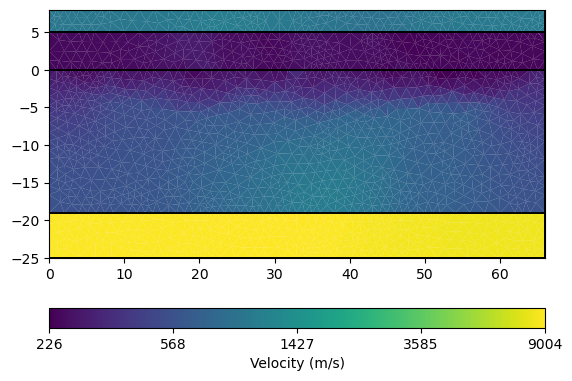

In [31]:
data["err"] = 0.001
mgr = tt.Manager(data)
mgr.setMesh(meshVel)
mgr.inv.setRegularization('*', background=False)
mgr.invert(verbose=True)
mgr.showResult()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x239625b8460>)

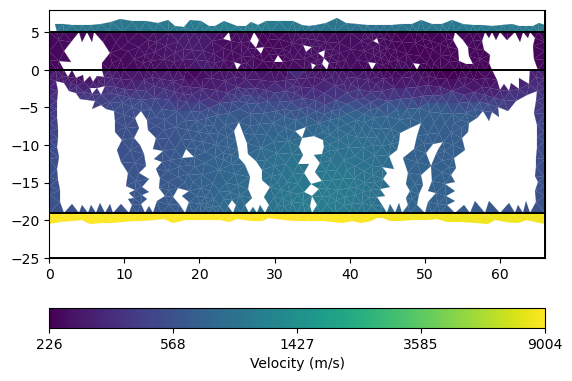

In [32]:
mgr.showResult(coverage=mgr.standardizedCoverage())

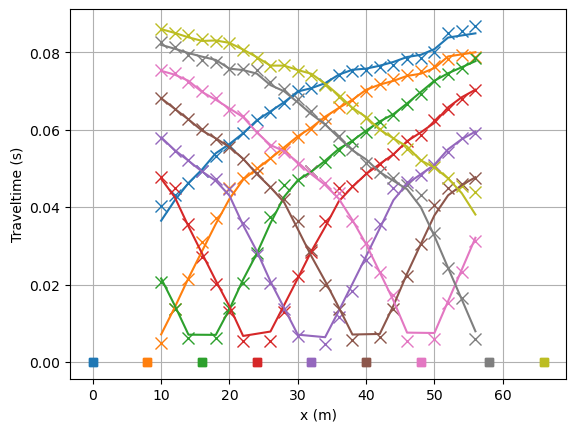

In [33]:
mgr.showFit()

In [34]:
mgr.invert(startModel=1/vel, verbose=True)

23/02/24 - 09:28:25 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x0000023933CB3770>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000023961FC4E50>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002396276CE20>
min/max (data): 0.0046/0.09
min/max (error): 1.15%/21.74%
min/max (start model): 5.0e-04/0.005
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1558.53
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  326.17 (dPhi = 78.89%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  281.55 (dPhi = 13.81%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  262.31 (dPhi = 6.91%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  240.

2913 [279.4860393431764,...,199.99999999999991]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x239628d0eb0>)

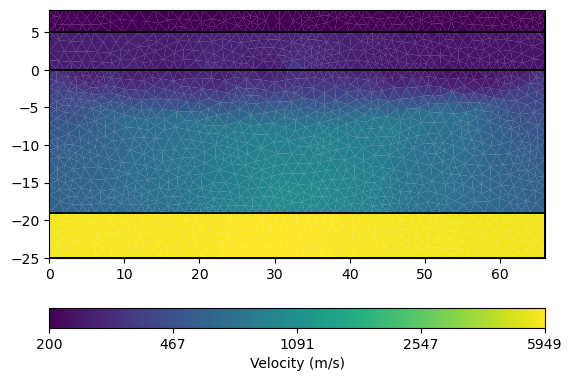

In [36]:
mgr.showResult()